## 1 Zipf's Law

According to Zipf's law, there is a constant $k = f_{i} * r_{i}$, with $f_{i}$ being the frequency of the i-th word and $r_{i}$ being the rank of the i-th word. This constant should be the same for each word, but this is only an approximation for the real world data.

Most plots seem to be very close to the ideal Zipf's law curve. However, in the case of the SETIMES.bg-tr.bg corpus, there seem to be more words that occur very frequently compared to English and Turkish. 

Also, the King James Bible may have a unique word distribution compared to other literary works. Words such as "Lord," "God," and "Jesus" might be more frequent, and thus there is also a slight bump at the beginning of the curve for the most high frequency words. 🍄

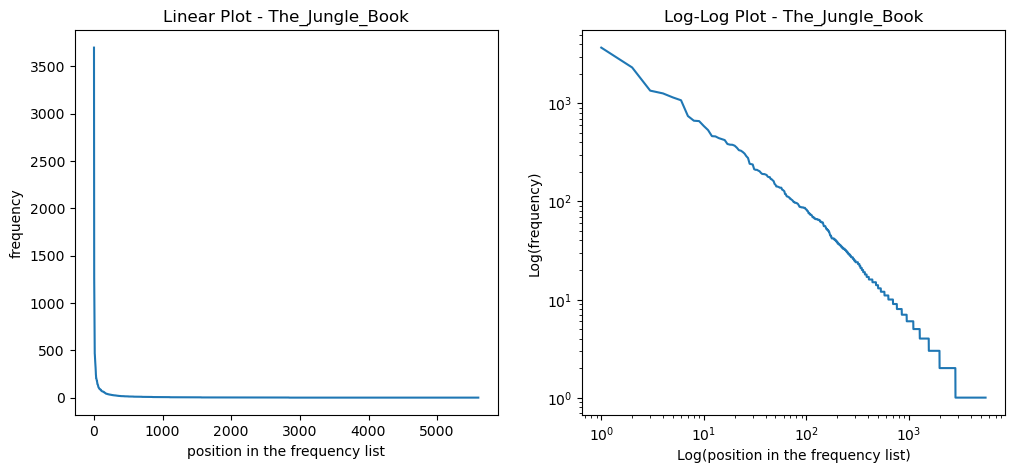

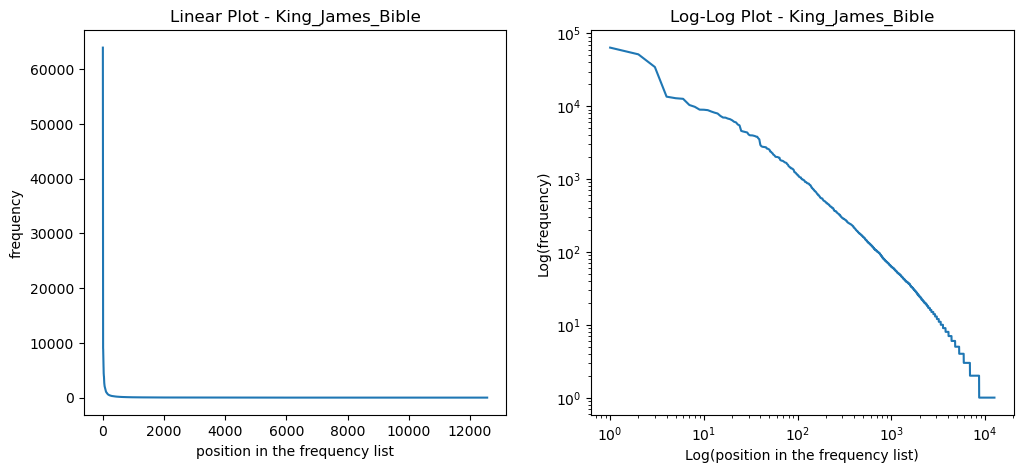

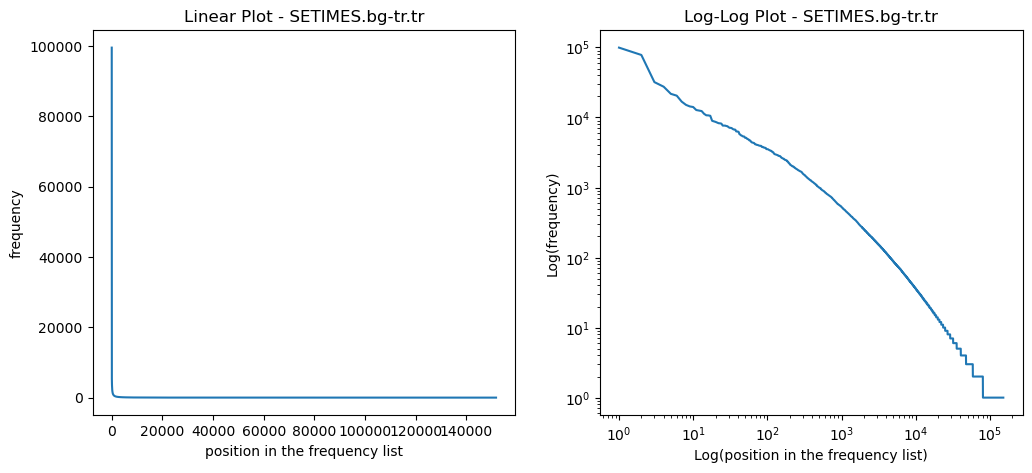

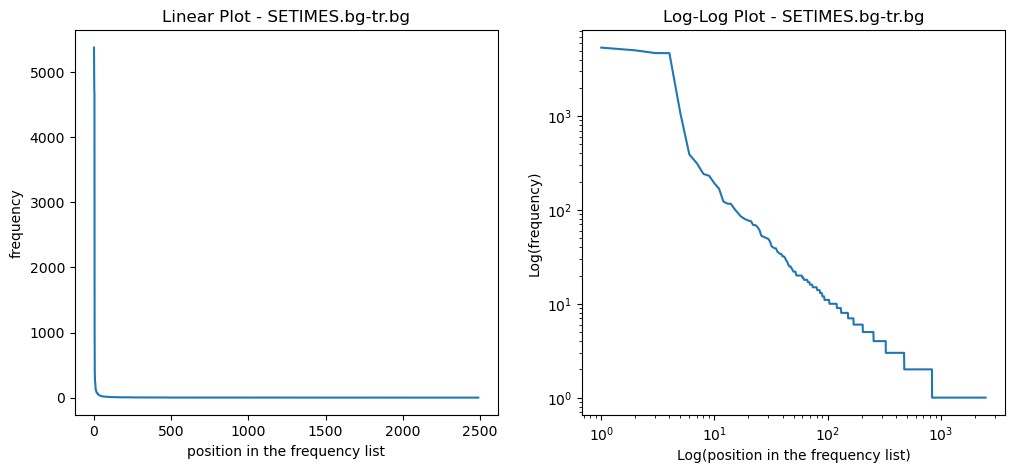

In [9]:
import matplotlib.pyplot as plt 
import re
from collections import Counter

def plot_word_frequency(filepath, filename):
    with open(filepath, 'r') as file: 
        text = file.read()

    cleaned_text = re.sub(r'[^a-zA-Z\s]','', text)
    cleaned_text = cleaned_text.lower()
    cleaned_text = cleaned_text.strip()
    words = cleaned_text.split() # Tokenize the cleaned text into words
    word_frequency = Counter(words) # Count the frequency of each word
    sorted_word_frequencies = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True) # sort the words in descending order
    words, frequencies = zip(*sorted_word_frequencies) # get words and frequencies for plotting

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) # create a figure with two subplots 
    # Linear Plot
    ax1.plot(range(1, len(frequencies) + 1), frequencies)
    ax1.set_title("Linear Plot - " + filename)
    ax1.set_xlabel("position in the frequency list")
    ax1.set_ylabel("frequency")

    # Log-Log Plot
    ax2.loglog(range(1, len(frequencies) + 1), frequencies)
    ax2.set_title("Log-Log Plot - " + filename)
    ax2.set_xlabel("Log(position in the frequency list)")
    ax2.set_ylabel("Log(frequency)")

    #plt.savefig(filename + ".png")
    plt.show()
    
filepaths = ["junglebook.txt", "kingjamesbible_tokenized.txt", "./setimes/SETIMES.bg-tr.tr", "./setimes/SETIMES.bg-tr.bg"]
filenames = ["The_Jungle_Book", "King_James_Bible", "SETIMES.bg-tr.tr", "SETIMES.bg-tr.bg"]

for i in range(len(filepaths)):
    plot_word_frequency(filepaths[i], filenames[i])

## 2 Random Text Generation

**Corpus Selection 🎭**

I've chosen the TV corpus for text generation from: https://www.english-corpora.org/tv/

This is an introduction of the TV corpus: 

The TV Corpus contains 325 million words of data in 75,000 TV episodes from the 1950s to the current time. All of the 75,000 episodes are tied in to their IMDB entry, which means that you can create Virtual Corpora using extensive metadata -- year, country, series, rating, genre, plot summary, etc.

The TV corpus (along with the Movies Corpus) serves as a great resource to look at very informal language -- at least as well as with corpora of actual spoken English. In addition, the TV Corpus is much larger than any other corpus of informal English (other than other corpora from English-Corpora.org). For example, it is about 33x as large as the conversation portion of the BNC (including their 2014 update).

The corpus also allows you to look at variation over time (1950s-1970s to 1990s-2010s) and variation between dialects (e.g. American and British English). In this sense, the corpus is related to many other corpora of English that we have created. These corpora were formerly known as the "BYU Corpora", and they offer unparalleled insight into variation in English.

**Output Discussion 📖**

The 4-gram language model generates slightly more coherent sentences compared to the bi- and trigram models, although all models produce readable text to some degree. Ellipsis is more frequent in the bi- and trigram output than in the 4-gram output, likely due to the consideration of different preceding words as context. Additionally, colloquial language leads to more frequent punctuation, resulting in shorter sentences. Using higher n-gram values reduces text creativity as more content is directly derived from the source data.

(The code below takes about 18-20 seconds to run.)

In [11]:
filepath = "tv_text.txt"

from ngram import *
import random

k = open(filepath, 'r').read() #open and read the file
k_lowercase = k.lower() #make all letters lower case
k_remove = k_lowercase.strip() #remove leading and trailing characters
k_remove_n = k_remove.replace('\n'," ") #remove \n
k_remove_at = k_remove_n.replace('@', '')  # remove all occurrences of '@'

#convert string into list
def Convert(string):
    a = list(string.split(" "))
    return a

k_string = Convert(k_remove_at)
k_string = [word for word in k_string if word != ""]

n = 2
random_word_1 = random.choice(k_string)
ngram = BasicNgram(n,k_string)  #use the BasicNgram class to get a bigram list
p_b = ngram[(random_word_1,)]  #get the conditional probablilty of, in this case, the start of sentence mark
text = random_word_1  #create an empty strnig
for i in range(1,100):  #create a for loop that keeps adding the next word based on the p_b probability until there are 100 words
    generatedWord = p_b.generate()
    text = text + " " + generatedWord
    p_b = ngram[(generatedWord,)] #get the probability value of the next word based on the previous word

print("Bigram sentence:" + " " +text) #print the result


#use the BasicNgram class to get trigram
n=3
ngram = BasicNgram(n,k_string)

#get index
random_word_1_index = k_string.index(random_word_1)

listOfWords = [random_word_1, k_string[random_word_1_index + 1]] #create a list of words just to make it easier to get the probability value based on the n-1 & n-2 words
p_b = ngram[(random_word_1, k_string[random_word_1_index + 1])]
text = random_word_1 + ' ' + k_string[random_word_1_index + 1]
for i in range(1,100):
    generatedWord = p_b.generate()
    text = text + " " + generatedWord
    p_b = ngram[(listOfWords[-1],generatedWord)]
    listOfWords.append(generatedWord)

print("Trigram sentence:" + " " +text)

#use the BasicNgram class to get 4-gram
n=4
ngram = BasicNgram(n,k_string)
listOfWords = [random_word_1, k_string[random_word_1_index + 1],k_string[random_word_1_index + 2]]
p_b = ngram[(random_word_1, k_string[random_word_1_index + 1],k_string[random_word_1_index + 2])]
text = random_word_1 + ' ' + k_string[random_word_1_index + 1] + ' ' + k_string[random_word_1_index + 2]
for i in range(1,100):
    generatedWord = p_b.generate()
    text = text + " " + generatedWord
    p_b = ngram[(listOfWords[-2],listOfWords[-1],generatedWord)]
    listOfWords.append(generatedWord)

print("4-gram sentence:" + " " +text)


Bigram sentence: ! over 21 ! i 'm stuck in the novel the 12th century and willow ? just say that i mean anything , clarabell . - i did n't . okay .. just got tickets for five times . - come on the valley high possibility , give you lose - what 's got nothing that my turn out . mm-hmm . you do n't i mean , we ca n't had to talk more . your lieutenant hazard . tell you were staring at the treasure knowing they 're still weak ? massage for red meat blob also referred
Trigram sentence: ! - it must be a big dude , if glitz and the whole inquisition thing . look , um ... maria . hello , love . then i 'd like to welcome back , we 're here when we go ! i do n't negotiate with him , too . ( chuckles ) i 'm sorry she 's not gon na do ? drive my train ... until tonight . i need an address . ( inhigh-pitchedvoice ) hello , there 's nothing you 're shanna ? how you were so ... - brain . now , schultz-- i stalag
4-gram sentence: ! - we 're all here for you . they thought he was guilty of rape and mu

## 3 Statistical Dependence

Corpus chosen: The Jungle Book 📖

#### Discussion 

**🍥 Output**

The top 20 pairs with the highest PMI values are pairs that co-occur more frequently than would be expected under an independence assumption. These pairs suggest a strong association or relationship between the words, which might indicate specific concepts, contexts, or themes within the text.

On the other hand, the bottom 20 pairs with the lowest PMI values, such as ('that', 'and') and ('but', 'and'), indicate that these pairs co-occur less frequently than expected under an independence assumption. These pairs are likely to be common words that occur frequently in the text but do not hold strong associations or meaningful connections. 

**🍥 The validity of independence assumption for unigram models**

The unigram model assumes that each word is independent of its context, simplifying language analysis. However, this oversimplification ignores the inherent dependencies between words in natural language, limiting its accuracy, particularly for complex language tasks. Incorporating more sophisticated models, such as higher n-grams or neural network-based approaches can help capture contextual dependencies for more accurate language processing. 

In [10]:
import math 
from collections import Counter 
import re

filepath = "junglebook.txt"

with open(filepath, 'r') as file: 
    text = file.read().lower()
text = re.sub(r'[^a-zA-Z\s]','', text)
words = text.split()
word_freq = Counter(words)

min_word_frequency = 10 
filtered_words = [word for word in words if word_freq[word] >= min_word_frequency]
filtered_word_freq = Counter(filtered_words)
total_filtered_words = len(filtered_words)

# Initialize a dictionary to store pmi values and word pairs
pmi_values = {}
co_occurrences = {}

# Iterate through the corpus and calculate co-occurrences
for i in range(1, len(words)):
    word1 = words[i - 1]
    word2 = words[i]
    if word1 in filtered_words and word2 in filtered_words:
        if word1 not in co_occurrences:
            co_occurrences[word1] = {}
        
        if word2 not in co_occurrences[word1]:
            co_occurrences[word1][word2] = 0
        
        co_occurrences[word1][word2] += 1
    
# Calculate PMI and store it in the dictionary 
total_words = len(words)
for word1, word2_counts in co_occurrences.items():
    for word2, count in word2_counts.items():
        pmi = math.log2((count * total_words) / (word_freq[word1] * word_freq[word2]))
        pmi_values[(word1, word2)] = pmi
            
sorted_pmi = sorted(pmi_values.items(), key=lambda x: x[1], reverse=True)
top_20 = sorted_pmi[:20]
bottom_20 = sorted_pmi[-20:]

print("Top 20 Word Pairs with the Highest PMI values:")
for pair, pmi in top_20: 
    print(pair, pmi)
    
print("\nBottom 20 Word Pairs with the Lowest PMI values")
for pair, pmi in bottom_20: 
    print(pair, pmi)

Top 20 Word Pairs with the Highest PMI values:
('machua', 'appa') 12.267404120856364
('literary', 'archive') 12.040895591047684
('united', 'states') 11.834444713580258
('darzees', 'wife') 11.419407214301414
('archive', 'foundation') 11.281903690551479
('cold', 'lairs') 11.056837134916707
('gutenberg', 'literary') 10.834444713580258
('paragraph', 'f') 10.822472071914182
('stretched', 'myself') 10.682441620135208
('petersen', 'sahib') 10.599561348060613
('hind', 'legs') 10.393872122194278
('fore', 'paws') 10.281903690551479
('twenty', 'yoke') 10.19444084930114
('paragraph', 'e') 10.080269829381828
('whole', 'line') 10.004369715022571
('electronic', 'works') 9.986447807025309
('hind', 'flippers') 9.959975595664117
('master', 'words') 9.933980387131173
('years', 'ago') 9.893338402633827
('bring', 'news') 9.866866191272635

Bottom 20 Word Pairs with the Lowest PMI values
('that', 'and') -3.816406028544258
('but', 'and') -3.8185738652269676
('he', 'in') -3.862718345417439
('little', 'the') -